In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r"C:\Users\Dell\Downloads\archive\Face_Mask_Detection_Dataset_MaskNet"

img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 1117 images belonging to 3 classes.
Found 279 images belonging to 3 classes.


In [3]:
import os
os.listdir("C:/")


['!qhlogs.doc',
 '$Recycle.Bin',
 '$WINDOWS.~BT',
 'Config.Msi',
 'Dell',
 'dell.sdr',
 'Documents and Settings',
 'DumpStack.log',
 'DumpStack.log.tmp',
 'hiberfil.sys',
 'inetpub',
 'Intel',
 'msys64',
 'NvContainerRecoveryNVDisplay.ContainerLocalSystem.reg',
 'OneDriveTemp',
 'pagefile.sys',
 'PerfLogs',
 'Program Files',
 'Program Files (x86)',
 'ProgramData',
 'Recovery',
 'swapfile.sys',
 'System Repair',
 'System Volume Information',
 'Users',
 'Windows']

In [4]:
data_dir = r"C:\Users\Dell\Downloads\archive\Face_Mask_Detection_Dataset_MaskNet"


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


C:\Users\Dell\anaconda3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\envs\tf\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7658 - loss: 0.6906 - val_accuracy: 0.9857 - val_loss: 0.0677
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9980 - loss: 0.0200 - val_accuracy: 0.9857 - val_loss: 0.0748
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9987 - loss: 0.0081 - val_accuracy: 0.9677 - val_loss: 0.2284
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9997 - loss: 0.0047 - val_accuracy: 0.9606 - val_loss: 0.2667
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.0000 - loss: 8.6863e-04 - val_accuracy: 0.9892 - val_loss: 0.0814
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9997 - loss: 5.4542e-04 - val_accuracy: 0.9283 - val_loss: 0.8371
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9836 - loss: 0.0791 - val_accuracy: 0.9785 - v

In [6]:
model.save("face_mask_detector.h5")
print("Model saved successfully ✅")


Model saved successfully ✅


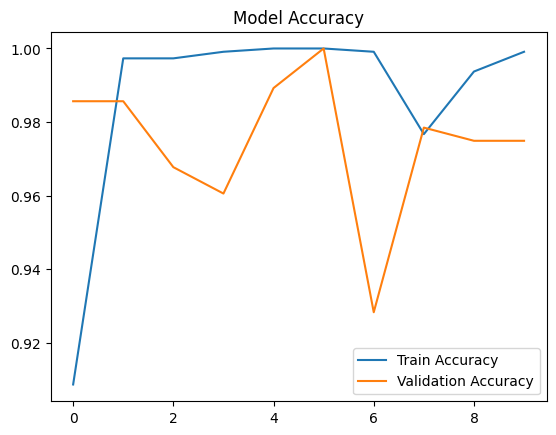

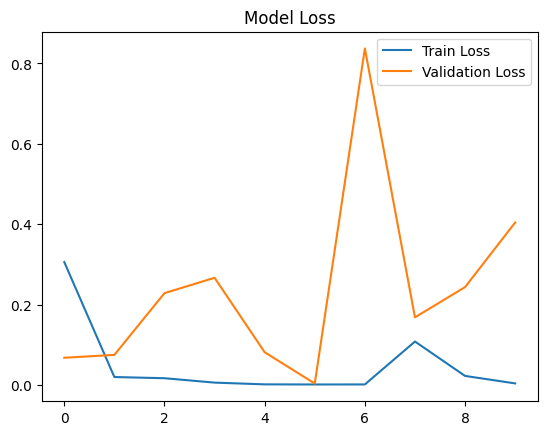

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [13]:
import numpy as np
import cv2
print("NumPy OK:", np.__version__)
print("OpenCV OK:", cv2.__version__)


NumPy OK: 2.0.2
OpenCV OK: 4.12.0


In [18]:
while True:
    ret, frame = cap.read()
    if not ret:
        print("⚠️ Unable to access webcam.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))
        face = face / 255.0
        face = np.expand_dims(face, axis=0)

        pred = model.predict(face, verbose=0)
        class_id = np.argmax(pred)
        label = class_names[class_id]

        color = (0, 255, 0) if label == "with_mask" else (0, 0, 255)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)

    cv2.imshow("Mask Detection - Press Q to Exit", frame)

    # exit on 'q' key or window close
    if cv2.waitKey(1) & 0xFF == ord('q') or cv2.getWindowProperty("Mask Detection - Press Q to Exit", 0) < 0:
        print("✅ Webcam closed successfully.")
        break

cap.release()
cv2.destroyAllWindows()
print("🎯 Program finished.")


⚠️ Unable to access webcam.
🎯 Program finished.


In [19]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("face_mask_detector.h5")
class_names = ["with_mask", "without_mask", "improper_mask"]

img_path = r"C:\Users\Dell\Downloads\archive\Face_Mask_Detection_Dataset_MaskNet\With Mask\B640.jpg"   # update path
img = cv2.imread(img_path)

if img is None:
    print("❌ Image not found — check path or rename to test.jpg")
else:
    img_resized = cv2.resize(img, (224,224)) / 255.0
    img_exp = np.expand_dims(img_resized, axis=0)
    pred = model.predict(img_exp)
    print("✅ Prediction:", class_names[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
✅ Prediction: improper_mask
